In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator


C:\Users\L470\AppData\Roaming\Python\Python313\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


In [5]:

X_train = np.loadtxt('input.csv', delimiter=',')
Y_train = np.loadtxt('labels.csv', delimiter=',')

X_test = np.loadtxt('input_test.csv', delimiter=',')
Y_test = np.loadtxt('labels_test.csv', delimiter=',')


In [6]:

X_train = X_train.reshape(len(X_train),100,100,3)
Y_train = Y_train.reshape(len(Y_train),1)

X_test = X_test.reshape(len(X_test),100,100,3)
Y_test = Y_test.reshape(len(Y_test),1)

X_train = X_train / 255.0
X_test = X_test / 255.0

#data augmentation to improve training
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    zoom_range=0.2
)    

In [7]:


print("shape of X_train:", X_train.shape)
print("shape of Y_train:", Y_train.shape)
print("shape of X_test:", X_test.shape) 
print("shape of Y_test:", Y_test.shape)

shape of X_train: (2000, 100, 100, 3)
shape of Y_train: (2000, 1)
shape of X_test: (400, 100, 100, 3)
shape of Y_test: (400, 1)


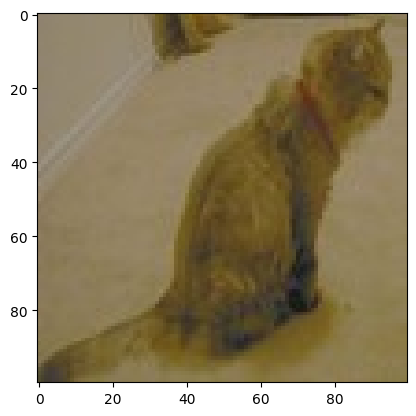

In [8]:
idx = random.randint(0, len(X_train))
plt.imshow(X_train[idx, :])
plt.show()

In [9]:
model=Sequential([
    Conv2D(32,(3,3),activation='relu',input_shape=(100,100,3)),
    MaxPooling2D((2,2)),

    Conv2D(32,(3,3),activation='relu'),
    MaxPooling2D((2,2)),
    
    Flatten(),
    Dense(64,activation='relu'),
    Dense(1,activation='sigmoid')
])


C:\Users\L470\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
model = Sequential()

model.add(Conv2D(32, (3,3), activation= 'relu', input_shape = (100,100,3))) # 32,64 is the filter
model.add(MaxPooling2D((2,2)))# converting 2d data to 1d data
model.add(Dropout(0.25)) # to remove particular data from the dataset

model.add(Conv2D(64, (3,3), activation= 'relu'))#(3,3) is the size of the filter( hidden layers)
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation = 'sigmoid'))

In [11]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [12]:

model.fit(datagen.flow(X_train, Y_train, batch_size=32),
          epochs=30,
          validation_data=(X_test, Y_test),
          verbose=1)

Epoch 1/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 33s 479ms/step - accuracy: 0.5055 - loss: 0.7035 - val_accuracy: 0.4975 - val_loss: 0.6942
Epoch 2/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 25s 384ms/step - accuracy: 0.5185 - loss: 0.6925 - val_accuracy: 0.5750 - val_loss: 0.6895
Epoch 3/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 22s 349ms/step - accuracy: 0.4970 - loss: 0.6934 - val_accuracy: 0.4975 - val_loss: 0.6917
Epoch 4/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 20s 317ms/step - accuracy: 0.5650 - loss: 0.6844 - val_accuracy: 0.5700 - val_loss: 0.6701
Epoch 5/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 20s 319ms/step - accuracy: 0.5855 - loss: 0.6720 - val_accuracy: 0.6125 - val_loss: 0.6556
Epoch 6/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 20s 320ms/step - accuracy: 0.5840 - loss: 0.6708 - val_accuracy: 0.6300 - val_loss: 0.6487
Epoch 7/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 25s 392ms/step - accuracy: 0.6145 - loss: 0.6556 - val_accuracy: 0.6025 - val_loss: 0.6454
Epoch 8/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 22s 332ms/step - accuracy: 0.6225 - loss: 0.6545 - val_accu

In [10]:
model.evaluate(X_test, Y_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 100ms/step - accuracy: 0.7750 - loss: 0.5267


[0.5267311334609985, 0.7749999761581421]

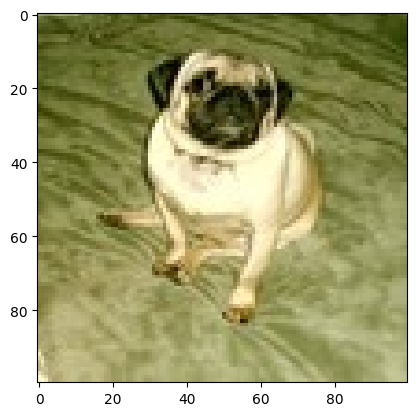

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
The model prediction is dog


In [11]:

idx2= random.randint(0, len(Y_test))
plt.imshow(X_test[idx2, :])
plt.show()

y_pred = model.predict(X_test[idx2, :].reshape(1,100,100,3))
y_pred = y_pred > 0.5

if(y_pred == 0):
    pred = "dog"

else: 
    pred = 'cat'

print("The model prediction is", pred)

In [12]:

model.save('model.h5')
print('our model is saved')


our model is saved
